In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import confusion_matrix
import cv2 
import glob
import matplotlib.pyplot as plt
import tensorflow as tf 
from keras import applications
from keras.models import Model
from keras import optimizers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Dropout,GlobalAveragePooling2D
#from keras import backend as K
from keras import applications
from keras.callbacks import ModelCheckpoint,EarlyStopping

Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,
                                   fill_mode = "nearest",
                                   width_shift_range = 0.3,
                                   height_shift_range=0.3,
                                   rotation_range=30,
                                   )
#zoom-random
#enough transformations
validation_datagen = ImageDataGenerator(rescale=1./255)



training_set = train_datagen.flow_from_directory(
        '/home/anjali/Desktop/ship_classification/train_data',
         batch_size=32,
         class_mode='categorical',
          target_size=(299,299))

validation_set = validation_datagen.flow_from_directory(
        '/home/anjali/Desktop/ship_classification/validation_data',
         batch_size=32,
         class_mode='categorical',
         target_size=(299,299))

Found 5002 images belonging to 5 classes.
Found 1250 images belonging to 5 classes.


In [3]:
model = applications.VGG19(weights = "imagenet", include_top=False,input_shape = ( 299, 299, 3))


In [4]:
#model.summary()

In [5]:
input = Input(shape=(299,299,3),name = 'image_input')
output = model(input)

In [6]:
x = Flatten(name='flatten')(output)#fetching weights from our model 
x = Dense(2048, activation='relu', name='fc1')(x)
x = Dense(2048, activation='relu', name='fc2')(x)
x = Dense(5, activation='softmax', name='predictions')(x)

In [7]:
model = Model(inputs=input, outputs=x)
model.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [8]:
#model.summary()

In [10]:
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')
history=model.fit_generator(
training_set,
steps_per_epoch = 1000,
epochs =10,
validation_data = validation_set,
validation_steps = 124,
callbacks = [ early])

Epoch 1/10
1000/1000 [==============================] - 2553s 3s/step - loss: 0.6559 - acc: 0.7400 - val_loss: 0.4760 - val_acc: 0.8352
Epoch 2/10
1000/1000 [==============================] - 2088s 2s/step - loss: 0.2890 - acc: 0.8911 - val_loss: 0.3045 - val_acc: 0.8914
Epoch 3/10
1000/1000 [==============================] - 1498s 1s/step - loss: 0.2046 - acc: 0.9244 - val_loss: 0.2959 - val_acc: 0.8997
Epoch 4/10
1000/1000 [==============================] - 1501s 2s/step - loss: 0.1606 - acc: 0.9406 - val_loss: 0.2570 - val_acc: 0.9216
Epoch 5/10
1000/1000 [==============================] - 1493s 1s/step - loss: 0.1327 - acc: 0.9509 - val_loss: 0.2549 - val_acc: 0.9146
Epoch 6/10
1000/1000 [==============================] - 1495s 1s/step - loss: 0.1095 - acc: 0.9598 - val_loss: 0.3124 - val_acc: 0.9183
Epoch 7/10
1000/1000 [==============================] - 1497s 1s/step - loss: 0.0874 - acc: 0.9680 - val_loss: 0.3733 - val_acc: 0.9051
Epoch 00007: early stopping


In [11]:
history

In [12]:
model.save('model1.h5')

In [13]:
pred1 = model.predict_generator(validation_set,steps=len(validation_set), verbose=1)

40/40 [==============================] - 19s 474ms/step


In [16]:

predicted_classes = np.argmax(pred1, axis=1)

In [17]:
true_classes = validation_set.classes
class_labels = list(validation_set.class_indices.keys())  

In [19]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

              precision    recall  f1-score   support

           1       0.34      0.39      0.36       425
           2       0.17      0.15      0.16       233
           3       0.16      0.15      0.16       183
           4       0.18      0.17      0.17       166
           5       0.23      0.21      0.22       243

   micro avg       0.25      0.25      0.25      1250
   macro avg       0.21      0.21      0.21      1250
weighted avg       0.24      0.25      0.24      1250



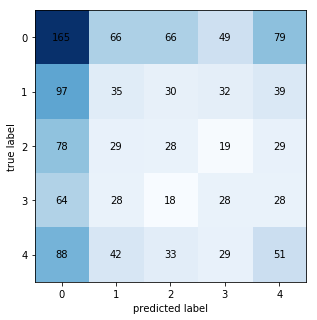

In [20]:
conf_mat = confusion_matrix(true_classes, predicted_classes) 
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = conf_mat ,  figsize=(5, 5))
plt.show()